## Group Contribution Statement
Beginning with the Exploratory Analysis, we collectively decided on what kind of tables and graphs that we thought were needed. Yun wrote the code for the penguin summary tables, and Noah wrote the code for the pair plot and some of the other graphs. Esther helped review and propose different types of data and graphs that we could use.

Esther wrote most of the Feature Selection section and it was reviewed by Noah and Yun.

Each member contributed toward the plot_regions function.

Each group member worked on their own models and their respective analysis for each model: 
1. Yun - Support Vector Machines
2. Esther - KNeighbor Classifier
3. Noah - Random Forest Classifier.

The discussion section at the end was written by Noah, but all group members collectively contributed to the content.



## Exploratory Analysis

Import neccesary moudles and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

Here are the first five rows of the data displayed. 

In [ ]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


To get a better sense of the relationships between the qualitative and quantitative data, we created a function to display a summary table of any combination of quantitative characteristics and the average of qualitative characteristics. Each of the summary tables are based on the two quantitative variables that we deemed were important: Sex and Island. By creating these two tables, we are able to compare qualitiative values of other variables in order to influence our decisions regarding further exploratory analysis.

By comparing some of the quantitative values, we noticed that the average Delta 15 N and Delta 13 C for each species are too similar in value to each other to be used as identifying characteristics, ruling out those variables as potential candidates for our models.

Culmen Length and Flipper Length also seemed to be promising candidates for the quantitative features of our models as the average measurement for each species on Biscoe and Dream Island (the only islands with multiple species) were very distinct from each other.

In [ ]:
#groupby
def penguin_summary_table(group_cols,value_cols):
  '''
  Function takes in qualitative columns (group_cols) and 
  quantitative columns (value_cols) and returns a summary
  table with the mean of each element in value_cols
  grouped by each group in group_cols 
  '''
  return penguins.groupby(group_cols)[value_cols].mean()

In [ ]:
penguin_summary_table(['Island',"Species"], ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Delta 15 N (o/oo)",	"Delta 13 C (o/oo)"])

Culmen Length (mm)  ...  Delta 13 C (o/oo)
Island    Species                                                        ...                   
Biscoe    Adelie Penguin (Pygoscelis adeliae)                 38.975000  ...         -25.918702
          Gentoo penguin (Pygoscelis papua)                   47.504878  ...         -26.185298
Dream     Adelie Penguin (Pygoscelis adeliae)                 38.501786  ...         -25.747446
          Chinstrap penguin (Pygoscelis antarctica)           48.833824  ...         -24.546542
Torgersen Adelie Penguin (Pygoscelis adeliae)                 38.950980  ...         -25.757806

[5 rows x 6 columns]

In [ ]:
penguin_summary_table(['Sex',"Species"], ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Delta 15 N (o/oo)",	"Delta 13 C (o/oo)"])

Culmen Length (mm)  ...  Delta 13 C (o/oo)
Sex    Species                                                        ...                   
.      Gentoo penguin (Pygoscelis papua)                   44.500000  ...         -26.184440
FEMALE Adelie Penguin (Pygoscelis adeliae)                 37.257534  ...         -25.794158
       Chinstrap penguin (Pygoscelis antarctica)           46.573529  ...         -24.565405
       Gentoo penguin (Pygoscelis papua)                   45.563793  ...         -26.197205
MALE   Adelie Penguin (Pygoscelis adeliae)                 40.390411  ...         -25.833813
       Chinstrap penguin (Pygoscelis antarctica)           51.094118  ...         -24.527679
       Gentoo penguin (Pygoscelis papua)                   49.473770  ...         -26.170608

[7 rows x 6 columns]

We then used Seaborn to plot all the possible combinations of the remaingin quantitative variables (Culmen Length, Culmen Depth, Flipper Length, and Body Mass) to find a pair of characteristics that resulted in separate and distinct clusters for each species meaning that it would be easy to distinguish each species based off of those two characteristics. The graphs on the diagonal, where the qualitative characteristic is plotted against itself (i.e Body Mass vs Body Mass), are KDE plots which show the distribution of that characteristic for each species.

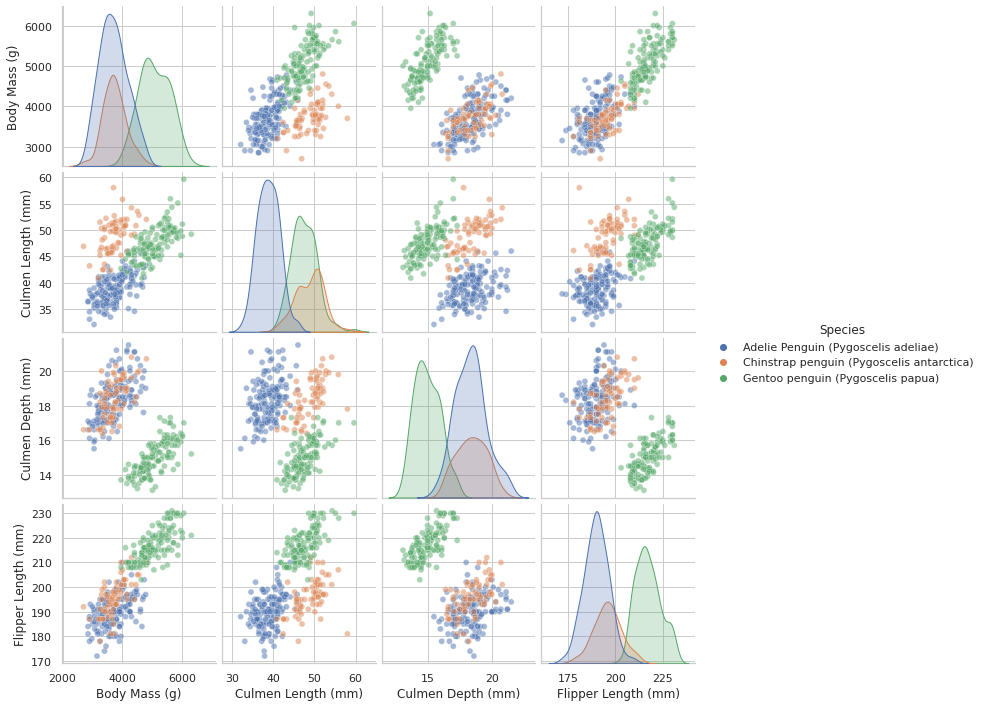

In [ ]:
sns.set_theme(style = "whitegrid")

cols = ['Body Mass (g)', "Culmen Length (mm)", "Culmen Depth (mm)", 
        "Flipper Length (mm)", "Species"]
test_df = penguins[cols]

sns.pairplot(test_df, hue = "Species", plot_kws = {'alpha': 0.5})

Of all the combinations, it seems that Culmen Length & Culmen Depth and Culmen Length & Flipper Length resulted in the scatter plots with the most separate and distinct clusters with little overlap of each species. All other scatter plots had either 2 species overlap each other or were clustered very close together.

We then plotted these two combinations again to get a closer look at the distribution of the data.

In [ ]:
def plot_scatter_species(index, x_axis, y_axis):
  '''
  Function plots scatter plot of the 3 species of penguins dataset
  using given quantitative characteristics (strings) along the x and y axis
  in specified axes of suplot given by index (int). 
  '''
  unique_species = np.unique(penguins["Species"])
  for i in unique_species: 
    species = (penguins["Species"] == i) 
    species = penguins[species] 
    ax[index].scatter(species[x_axis], species[y_axis], alpha = 0.5, label=i)
    ax[index].set_xlabel(x_axis)
    ax[index].set_ylabel(y_axis)
    ax[index].legend()

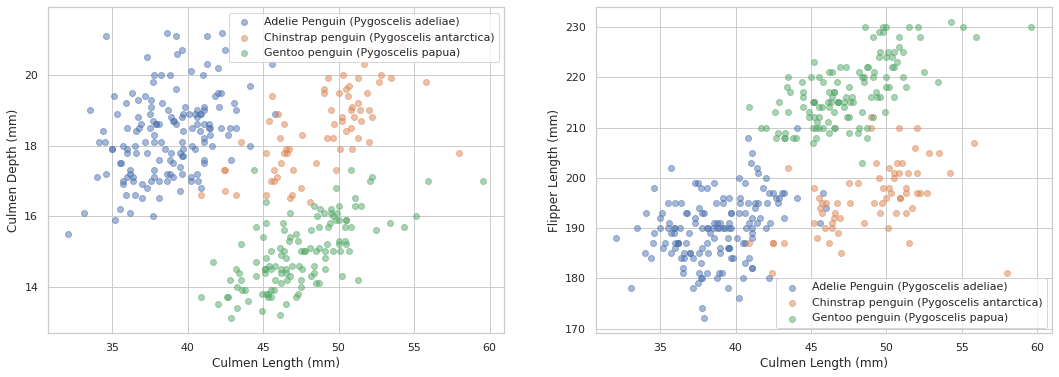

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
plot_scatter_species(0, "Culmen Length (mm)", "Culmen Depth (mm)")
plot_scatter_species(1, "Culmen Length (mm)", "Flipper Length (mm)")

We then further explored the distribution of Flipper Length according to Sex instead of Island to see if this would result in better distinction between species. There was one penguin in the data set that was unable to be sexed so we cleaned the data set of the unsexed penguin so that it would not be plotted separately.  

However, we noticed the overlap between Adelie and Chinstrap penguins and decided against using sex as the qualitative factor.  



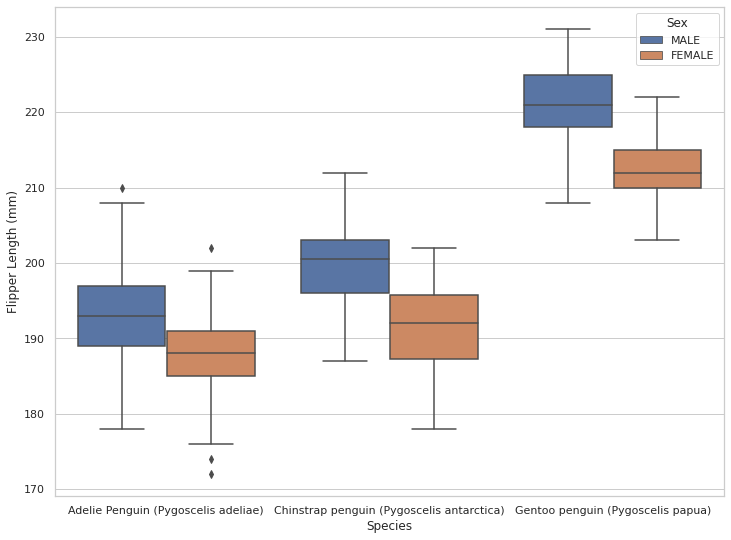

In [ ]:
penguins_sex = penguins[penguins["Sex"] != "."]
fig, ax = plt.subplots(figsize = (12, 9))
fgrid = sns.boxplot(x = "Species", 
                    y = "Flipper Length (mm)",
                    hue = 'Sex',
                    data = penguins_sex)

We again compared using either Sex or Island as the qualitative variable for Culmen Length & Culmen Depth. While plotting according to Sex still results in distinct and separate clusters for all three species, the islands only have at maximum two species at a time, which will likely make it easier for the model to accurately classify species according to Island instead of Sex for Culmen Length & Culmen Depth.

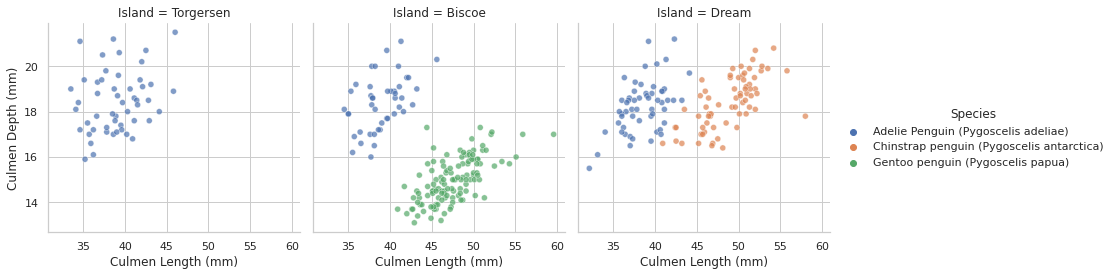

In [ ]:
fgrid=sns.relplot(data = penguins, x="Culmen Length (mm)", y= "Culmen Depth (mm)", col="Island",
          hue="Species", height=4, aspect = 1, alpha=0.7)

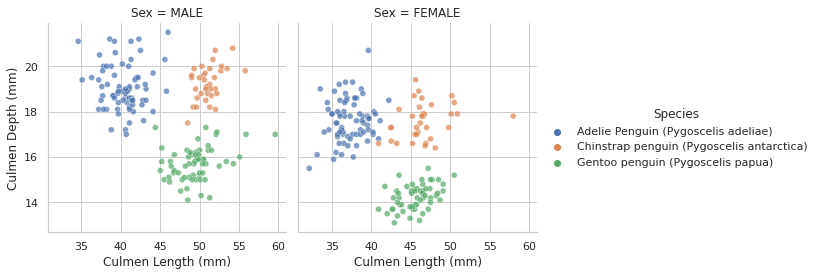

In [ ]:
fgrid=sns.relplot(data=penguins_sex, x="Culmen Length (mm)", y= "Culmen Depth (mm)", col="Sex",
          hue="Species", height = 4, aspect = 1, alpha=0.7)


## Feature Selection

We decided to use Culmen Length (mm) and Culmen Depth (mm) as the quantitative features and Island as the qualitative feature. 
 
We chose this combination of characteristics because we discovered in the Exploratory Analysis Section that Culmen Length & Culmen Depth and Culmen Length & Flipper Length resulted in distinct and separate clusters for each species, meaning it would be easy for the model to distingiush between species using these combinations as the training data. 

Moreover, using Island as the qualitative feature narrows the species down further because each island has at most only 2 species.

In [ ]:
penguin_summary_table(['Island',"Species"], ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)"])

Culmen Length (mm)  ...  Flipper Length (mm)
Island    Species                                                        ...                     
Biscoe    Adelie Penguin (Pygoscelis adeliae)                 38.975000  ...           188.795455
          Gentoo penguin (Pygoscelis papua)                   47.504878  ...           217.186992
Dream     Adelie Penguin (Pygoscelis adeliae)                 38.501786  ...           189.732143
          Chinstrap penguin (Pygoscelis antarctica)           48.833824  ...           195.823529
Torgersen Adelie Penguin (Pygoscelis adeliae)                 38.950980  ...           191.196078

[5 rows x 3 columns]

In [ ]:
penguin_summary_table(['Sex',"Species"], ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)"])

Culmen Length (mm)  ...  Flipper Length (mm)
Sex    Species                                                        ...                     
.      Gentoo penguin (Pygoscelis papua)                   44.500000  ...           217.000000
FEMALE Adelie Penguin (Pygoscelis adeliae)                 37.257534  ...           187.794521
       Chinstrap penguin (Pygoscelis antarctica)           46.573529  ...           191.735294
       Gentoo penguin (Pygoscelis papua)                   45.563793  ...           212.706897
MALE   Adelie Penguin (Pygoscelis adeliae)                 40.390411  ...           192.410959
       Chinstrap penguin (Pygoscelis antarctica)           51.094118  ...           199.911765
       Gentoo penguin (Pygoscelis papua)                   49.473770  ...           221.540984

[7 rows x 3 columns]

With Island as the qualitative feature, there was little difference between using either Flipper Length or Culmen Depth as the second quantitative feature. 

However, there was less overlap between Adelide and Chinstrap penguins on Dream Island using Culmen Depth, so we decided to use Culmen Depth.

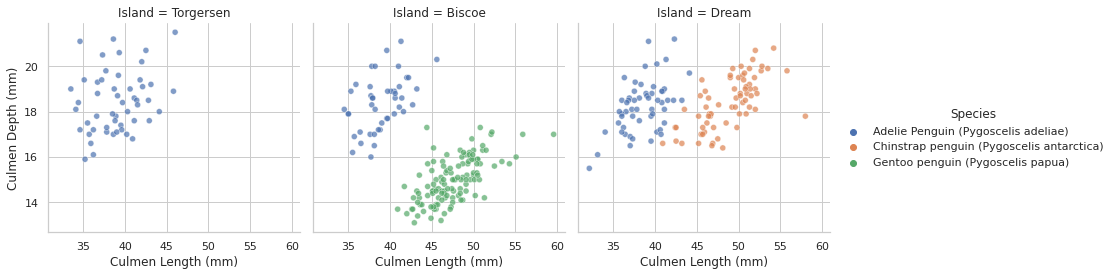

In [ ]:
fgrid=sns.relplot(data = penguins, x="Culmen Length (mm)", y= "Culmen Depth (mm)", col="Island",
          hue="Species", height=4, aspect = 1, alpha=0.7)

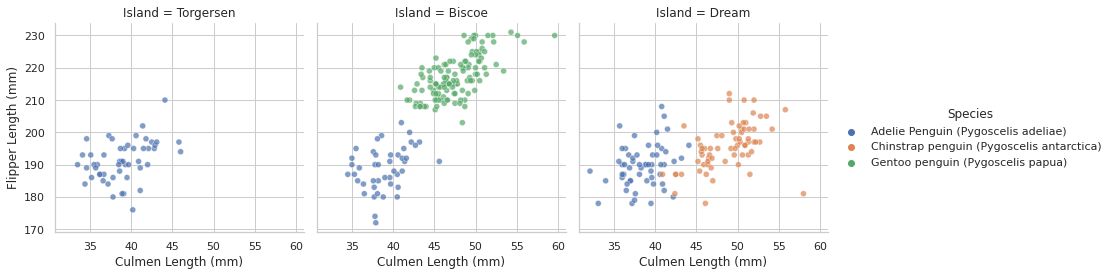

In [ ]:
fgrid=sns.relplot(data = penguins, x="Culmen Length (mm)", y= "Flipper Length (mm)", col="Island",
          hue="Species", height=4, aspect = 1, alpha=0.7)

Additionally, we also found in discussion (Penguins 2) that this combination of quantitative factors produced a reasonably accurate decision tree (96% accuracy) to guess the species, thus this further confirmed our decision to use these features. 


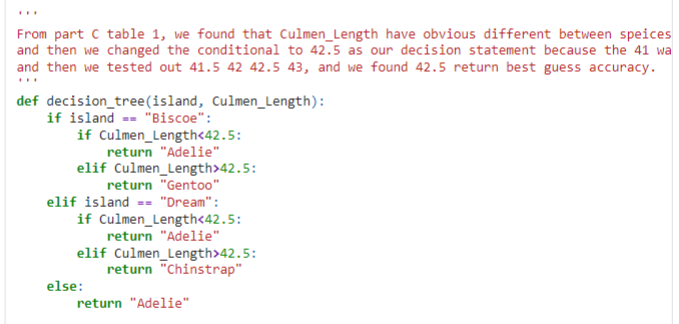






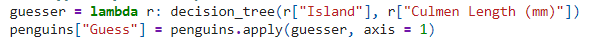






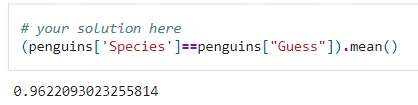

## Data Import and Cleaning

In [ ]:
train, test = train_test_split(penguins, test_size = 0.2)

In [ ]:
# NOW CLEANING DATA
def clean(data):
    '''
    Function takes in a data frame and cleans it for use
    in machine learning models, meaning all columns are numerical values.
    It specficially returns 2 data frames back:
    X with the columns Island, Culmen Length, Culmen Depth
    y with the columns Species

    '''
    # First we want to select the columns we want to use, then drop any NaN values.
    df = data.copy()
    df = df[['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']]
    df = df.dropna() 
    
    # Now we want to turn 'Species' and 'Island' into numerical values that sklearn and use.
    le = preprocessing.LabelEncoder()
    df['Species'] = le.fit_transform(df['Species'])
    df['Island'] = le.fit_transform(df['Island'])
    
    # X is the qualitative and quantitative values WITHOUT the corresponding Species
    # y is the array of Species labeled by numbers
    # For the Species, Adelie = 0, Chinstrap = 1, Gentoo = 2
    X = df.drop(['Species'], axis = 1)
    y = df['Species'].values
    
    return(X, y)

In [ ]:
X_train, y_train = clean(train)
X_test, y_test = clean(test)

## Support vector machines
In this section, we using the Support vector machine model to train/test the dataset, where the SVM will create classifier line to seperate the data groups, and when it could not fully seperated in 2D then the SVM will raise the dataset to higher dimension. Eventaully, it will created an hyperplane that lieanrly seperate the different categories of data.


### SVM model finding parameter in gamma and C with the best cross vaild score
The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors. Therefore, a large value of Gamma will give biased result with high accuracy and vice-versa.

The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. So, a small C will indicates low accuarcty with less bias and vice-versa.

defination source: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

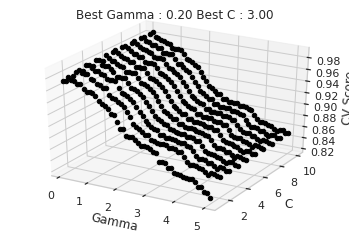

In [ ]:

fig = plt.figure()
ax=fig.add_subplot(projection='3d')

best_score_svm = 0

for i in np.linspace(0.1,5,50):
  for j in np.linspace(1,10,10):
    SVM = svm.SVC(gamma=i,C=j)
    SVM.fit(X_train, y_train)
    cv_score = cross_val_score(SVM, X_train, y_train, cv=10).mean()
    ax.scatter(i,j, cv_score, color = "black")
    if cv_score > best_score_svm:
        best_depth = i
        best_C=j
        best_score_svm = cv_score

l = ax.set(title = "Best Gamma : " + str("{:.2f}".format(best_depth))+ " Best C : " + str("{:.2f}".format(best_C)),
       xlabel = "Gamma", 
       ylabel = "C",
       zlabel = "CV Score")

In [ ]:
y_train_pred = SVM.predict(X_train)
c = confusion_matrix(y_train, y_train_pred)
c

array([[120,   0,   0],
       [  0,  55,   0],
       [  0,   0,  99]])

In [ ]:
mistakes = X_train[y_train != y_train_pred]
mistake_labels = y_train[y_train != y_train_pred]
mistake_preds = y_train_pred[y_train != y_train_pred]

mistake_preds, mistake_labels

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
SVM = svm.SVC(gamma=best_depth ,C=best_C)
SVM.fit(X_train, y_train)
SVM.score(X_train, y_train),SVM.score(X_test,y_test)

(0.9927007299270073, 0.9705882352941176)

In [ ]:
def plot_regions(c, input_data, island_num):
    '''
    Function plots the decision regions for given model, data frame, and
    island. 
    '''
    #sorting data based on island
    # First we want to select the columns we want to use, then drop any NaN values.
    data = input_data.copy()
    data = data[['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']]
    data = data.dropna() 
    
    # Now we want to turn 'Species' and 'Island' into numerical values that sklearn and use.
    le = preprocessing.LabelEncoder()
    data['Species'] = le.fit_transform(data['Species'])
    data['Island'] = le.fit_transform(data['Island'])
    data = data[data['Island'] == island_num]
    
    X = data.drop(['Species'], axis = 1)
    y = data['Species'].values
    
    # for convenience, give names to the two 
    # columns of the data
    x0 = X['Culmen Length (mm)']
    x1 = X['Culmen Depth (mm)']
    
    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    # extract model predictions, using the 
    # np.c_ attribute to join together the 
    # two parts of the grid. 
    # array.ravel() converts an multidimensional
    # array into a 1d array, and we use array.reshape()
    # to turn the resulting predictions p 
    # back into 2d
    
    XX = xx.ravel()
    YY = yy.ravel()
    ZZ = np.ones(len(XX))*island_num
    XY = np.c_[ZZ, XX, YY]
    
    p = c.predict(XY)
    p = p.reshape(xx.shape)
    
    # create the plot
    fig, ax = plt.subplots(1)
    
    # use contour plot to visualize the predictions
    ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2 )
    
    # plot the data
    ax.scatter(x0, x1, c = y, cmap = "jet", alpha = 0.8, norm = matplotlib.colors.Normalize(vmin = 0, vmax = 2))
    
    island_dict = {
        0: "Biscoe",
        1: "Dream",
        2: "Torgersen"}
    
    species_dict = {
        0: "Adelie Penguin",
        1: "Chinstrap Penguin",
        2: "Gentoo"}
    
    island_name = island_dict[island_num]
    
    ax.set(xlabel = "Culmen Length (mm)", 
           ylabel = "Culmen Depth (mm)",
           title = "Decision Regions for " + island_name) #+ Island
    
    #create legend using color map and species dictionary
    jet_cmap = matplotlib.cm.get_cmap(name = "jet")
    patches = []
    for i in range(3):
        patches.append(matplotlib.patches.Patch(color = jet_cmap(i/2), label = f"Species {species_dict[i]}"))
    
    
    
    ax.legend(handles = patches)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


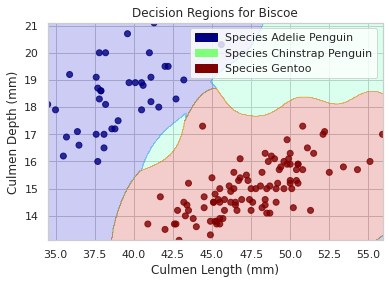

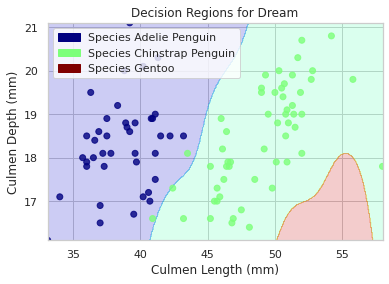

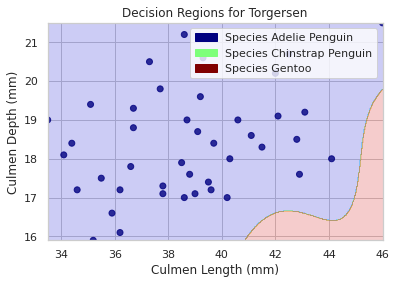

In [ ]:
for i in range(3):
  plot_regions(SVM, train, i)

From the plot region graphs above, notice in the second grapht that represents the Dream Island, there are some Chinstrap penguins that fall intot he Adelie penguin decision region. 

These mistakes most likely occured due to their separation from the rest of the species. Their culmen lengths seem to be on the lower end of for Chinstrap penguins, but also appear to be on the higher end of the Adelie Penguins. Additionally, the culmen depth does not provide significance variance between the species, so the model must determine the species only based on the culmen length. 

As a result, the Chinstrap penguins with somewhat unusual culmen lengths are labeled as Adelie penguins.

## KNeighbors Classifier

KNeighborsClassifier finds the next closest point(s) to the original, or the neighbors, and predicts the label using those neighbors. The number of neighbors it finds are predetermined by the user.

In [ ]:
KN = KNeighborsClassifier()
KN.fit(X_train, y_train)
KN.score(X_train, y_train)

0.9744525547445255

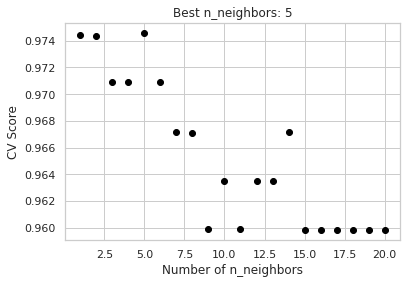

In [ ]:
fig, ax = plt.subplots(1)
best_score = 0

for i in range(1, 21):
    KN = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(KN, X_train, y_train, cv = 10).mean()
    ax.scatter(i, cv_score, color = "black")
    if cv_score > best_score:
        best_iter = i
        best_score = cv_score

l = ax.set(title = "Best n_neighbors: "+ str(best_iter),
          xlabel = "Number of n_neighbors",
          ylabel = "CV Score")

In [ ]:
KN = KNeighborsClassifier(n_neighbors = best_iter)
KN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_train_pred = KN.predict(X_train)
c = confusion_matrix(y_train, y_train_pred)
c

array([[118,   2,   0],
       [  3,  51,   1],
       [  0,   1,  98]])

In [ ]:
mistakes = X_train[y_train != y_train_pred]
mistake_labels = y_train[y_train != y_train_pred]
mistake_preds = y_train_pred[y_train != y_train_pred]

mistake_preds, mistake_labels

(array([2, 1, 1, 0, 0, 1, 0]), array([1, 2, 0, 1, 1, 0, 1]))

In [ ]:
KN.score(X_train, y_train), KN.score(X_test, y_test)

(0.9744525547445255, 0.9705882352941176)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


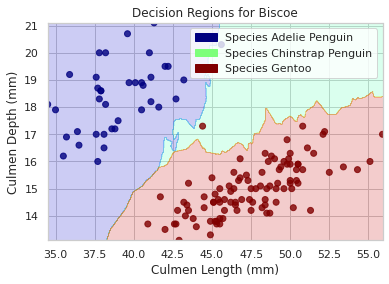

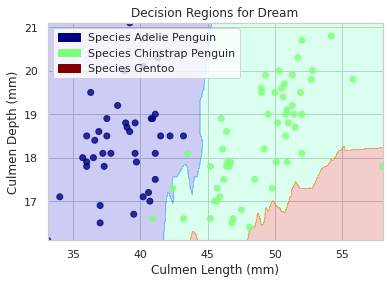

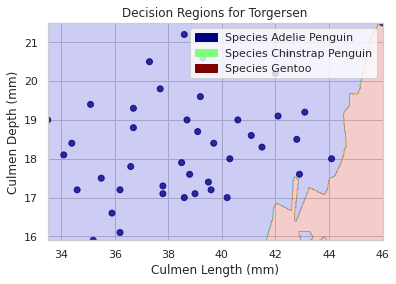

In [ ]:
for i in range(3):
  plot_regions(KN, train, i)

From the confusion matrix, the model mislabeled 7 penguins when predicting species. The model has difficulty distinguishing between Adelide and Chinstrap penguins as the mistakes that occured the most often involved these species. The most commonly occuring mistake, with three occurances, was mislabeling Chinstrap (1) as Adelie penguins (0). The next most common mistake, with two occurances, was mislabeling Adelie penguins (0) as Chinstrap (1). 

This is further reflected in the decision regions plots. In the plot for Dream Island, the only island with both Adelie and Chinstrap penguins, the decision region for the Adelie Penguin includes a few data points of the Chinstrap penguins. This is likely due to the misclasified Chinstrap penguins having lower than average culmen lengths which places them very close to the data points for Adelie penguins. Further, there is not much of a difference in culmen depth for the both species which makes it harder for the model to distinguish the separate species. 

## Random Forest Classifier


The Random Forest Classifier algorithm will generate multiple trees for which the data will use to predict the species of the penguin. It will choose the species that is returned by the most number of trees.
A benefit of the Random Forest Classifier is that it typically is less likely to overfit as compared ot other classifiers, as it generally ignores outliers or poor fittings that may occur on some trees.

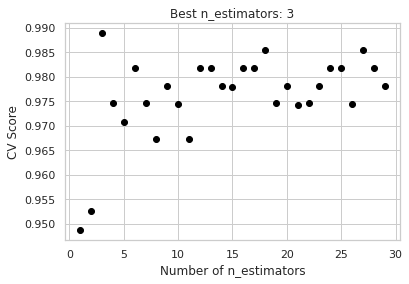

In [ ]:
fig, ax = plt.subplots(1)
best_score = 0

for i in range(1, 30):
    RF = RandomForestClassifier(n_estimators = i)
    cv_score = cross_val_score(RF, X_train, y_train, cv = 10).mean()
    ax.scatter(i, cv_score, color = "black")
    if cv_score > best_score:
        best_iter = i
        best_score = cv_score

l = ax.set(title = "Best n_estimators: "+ str(best_iter),
          xlabel = "Number of n_estimators",
          ylabel = "CV Score")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

RF = RandomForestClassifier(n_estimators = best_iter)
RF.fit(X_train, y_train)
RF.score(X_train, y_train),RF.score(X_test,y_test)

(0.9927007299270073, 0.9852941176470589)

In [ ]:
y_train_predict = RF.predict(X_train)
c = confusion_matrix(y_train, y_train_predict)
c

array([[119,   1,   0],
       [  1,  54,   0],
       [  0,   0,  99]])

In [ ]:
mistakes = X_train[y_train != y_train_predict]
mistake_labels = y_train[y_train != y_train_predict]
mistake_preds = y_train_pred[y_train != y_train_predict]

mistake_preds, mistake_labels

(array([0, 0]), array([0, 1]))

Above we have the confusion matrix which shows the strength of the model on the training data, but notice we also have a mistake. This could be due to the fact that one of the data points from a penguin can appear to be closer to other penguins of similar data values, but are from a different species. As a result, the model believes that the penguin belongs to a species that in actuality does not. 

Some of these mistakes in the training data could carry over to the test data, meaning that penguins with data values that tend to stray from the typical values of other penguins in their species may be identified to be from a different species.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


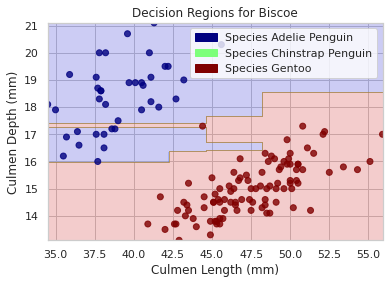

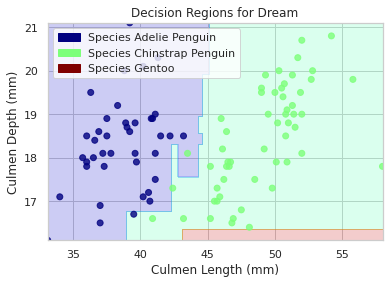

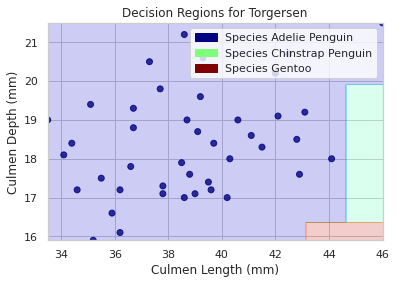

In [ ]:
for i in range(3):
  plot_regions(RF, train, i)

We have split the models into separate islands, as not only did it make the identification of species easier, but we are able to see clear differences of quantitative characteristics inside each island as well. 

The first graph depicts the Adelie and Gentoo penguins on the Biscoe Island, as Chinstraps were not present. By comparing their culmen lengths and culmen depths, we can see quite a distinct disparity between the data points of each species, and this can be reflected by the decision regions. 

The seccond graph features Adelie and Chinstrap penguins on the Dream Island. Again, we can notice a relatively distinct divide between quantitative data of each species, but there is more potential overlap here than what we had seen on Biscoe Island. These data points that are very close to each other can potentially cause our model to return inaccurate predictions.

Finally, the last graph features only Adelie Penguins on the Torgerson Island, as there are no other penguins on this Island. This makes it very easy for our model to identify the species if the island is Torgerson. As mentioned earlier, using island as a qualitative variable allows the model to make much more consistent and accurate predictions since there is a situaion like this were only one potential species can be on an island.

Based on the data from each of the graphs, we can conclude that our model will most likely very accurate with its predictions due to the clear decision regions on each island. With minimal overlapping data, there can be a great chance that our model does not make a mistake in our test cases.

## Discussion

In [ ]:
SVM.score(X_test,y_test), KN.score(X_test,y_test), RF.score(X_test,y_test)

(0.9705882352941176, 0.9705882352941176, 0.9852941176470589)

Here are the following scores for each model:
1. Support Vector Machine: 97.1%
2. K Neighbors Classifier: 97.1%
3. Random Forest Classifier: 98.5%

Notice that all of the models performed well each with a score above 97%, and the Random Forest Classifier performed the best with a score of 98.5%.

From our data collection, we would recommend the Random Forest Classifier with the quantitative data being Culmen Length and Culmen Depth, and the qualitative data being island as this achieved the highest score on the test data.

With more data available, the models could have more training data in order to create stronger models that do a better job in distinguishing between species. Specifically, a larger sample size of penguins would provide more points of reference for each of the models to use. 

Further, according to the decision region plots for Dream Island, all models misclassified at least one Chinstrap pengiun as Adelie. Culmen depth is useful in distinguishing between Adelie and Gentoo but it is less useful distinguishing between Adelie and Chinstrap. Thus, if there were another quantitative feature that could show a distinct difference between  Adelie penguins and the other species, we could use it in place of Culmen Depth and likey have a higher accuracy for every model.